In [2]:
library(quantstrat)
library(Quandl)

In [3]:
ls(all=T)

[1] ".blotter"  ".pbd_env"  ".strategy"

In [4]:
#Define instruments
currency("USD")
stock("BIST", currency="USD", multiplier=1)

[1] "USD"

[1] "BIST"

In [5]:
#get data
.from = '2005-08-01'
.to = '2016-05-25'

BIST<-Quandl("GOOG/INDEXIST_XU100", type="xts", start_date=.from, end_date=.to)
BIST<-na.omit(BIST)

In [6]:
BIST<-xts(coredata(BIST), as.POSIXct(time(BIST))) # convert dates to POSIXct

In [7]:
head(BIST)

                        Open     High      Low    Close Volume
2005-08-01 03:00:00 29615.29 29935.55 29401.69 29776.69      0
2005-08-02 03:00:00 29776.69 29881.48 29326.23 29543.48      0
2005-08-03 03:00:00 29543.48 29996.22 29492.07 29727.05      0
2005-08-04 03:00:00 29727.05 30163.10 29727.05 30123.59      0
2005-08-05 03:00:00 30123.59 30123.59 29783.82 29945.44      0
2005-08-08 03:00:00 29945.44 30125.81 29671.03 29924.83      0

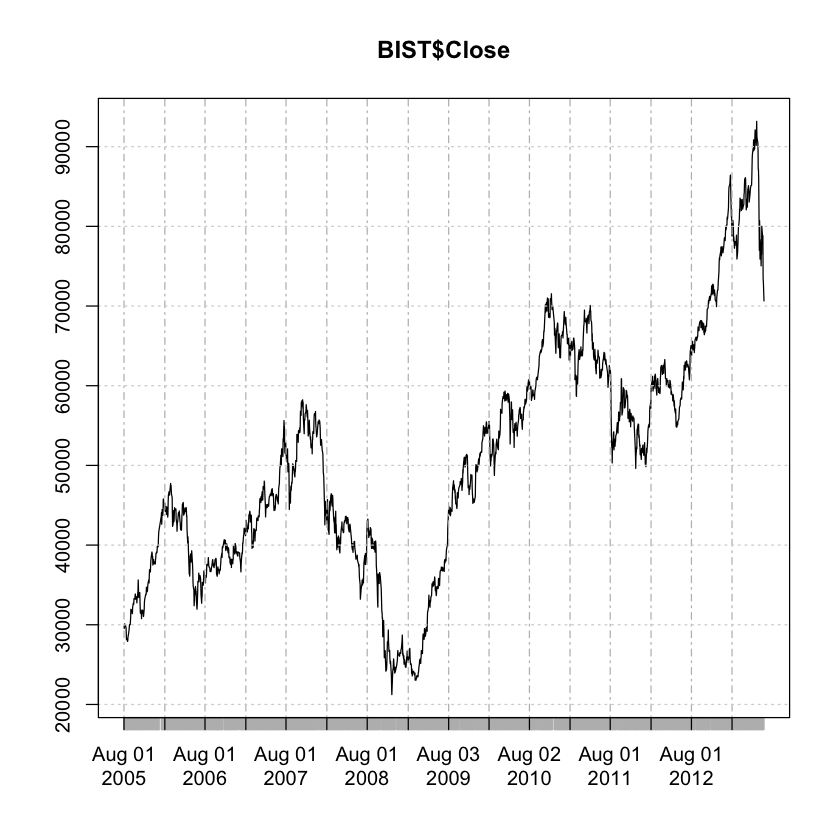

In [8]:
plot(BIST$Close)

to avoid bias. first you should look at the data to have a random sample.

In [9]:
strategy.st = "GoldenCross"
portfolio.st = "TrendFollowing"
account.st = "QmaxInvestment"
#.blotter<-new.env()
#.strategy<-new.env()

#you should first remove old strategy
rm.strat(strategy.st)
rm.strat(portfolio.st)
rm.strat(account.st)

In [10]:
initDate<-as.character(as.Date(.from)-1) #One day before data starts
initEq<-30000

initPortf(portfolio.st, symbols="BIST", initDate=initDate, currency="USD")
initAcct(account.st, portfolios=portfolio.st, initDate=initDate, currency="USD", initEq=initEq)
initOrders(portfolio.st, initDate=initDate)
strategy(strategy.st, store=TRUE)

[1] "TrendFollowing"

[1] "QmaxInvestment"

In [11]:
# Add indicators
.fast = 10
.slow = 20

add.indicator(strategy.st, name="SMA", arguments = list ( x = quote(Cl(mktdata)[,1]), n=.fast ), label="nFast" )
add.indicator(strategy.st, name="SMA", arguments = list ( x = quote(Cl(mktdata)[,1]), n=.slow ), label="nSlow" )
#quote is optional. it evaluates the function when it is called.

[1] "GoldenCross"

[1] "GoldenCross"

In [12]:
summary(get("GoldenCross", envir = .strategy))

            Length Class  Mode     
name        1      -none- character
assets      0      -none- NULL     
indicators  2      -none- list     
signals     0      -none- list     
rules       1      -none- list     
constraints 0      -none- NULL     
init        0      -none- list     
wrapup      0      -none- list     
call        3      -none- call     

In [13]:
# Add signals
add.signal(strategy.st, name="sigCrossover",
           arguments= list(columns=c("nFast","nSlow"), relationship="gte"),
           label="long")

add.signal(strategy.st, name="sigCrossover",
           arguments= list(columns=c("nFast","nSlow"), relationship="lt"),
           label="short")

.orderqty = 1
.threshold = 0.005
.txnfees = 0

[1] "GoldenCross"

[1] "GoldenCross"

In [14]:
summary(get("GoldenCross", envir = .strategy))

            Length Class  Mode     
name        1      -none- character
assets      0      -none- NULL     
indicators  2      -none- list     
signals     2      -none- list     
rules       1      -none- list     
constraints 0      -none- NULL     
init        0      -none- list     
wrapup      0      -none- list     
call        3      -none- call     

In [15]:
add.rule(strategy.st,
         name="ruleSignal",
         arguments=list(
             sigcol="long",
             sigval=TRUE,
             orderside="long",
             ordertype="stoplimit",
             prefer="High",
             threshold=.threshold,
             tmult=TRUE,
             orderqty=+.orderqty,
             replace=FALSE
         ),
         type="enter",
         label="EnterLong")

[1] "GoldenCross"

In [16]:
add.rule(strategy.st,
         name="ruleSignal",
         arguments=list(
             sigcol="short",
             sigval=TRUE,
             orderside="long",
             ordertype="market",
             orderqty="all",
             TxnFees=.txnfees, #only on exits
             replace=TRUE #replace any pending orders.
         ),
         type="exit",
         label="Exit2Short")

[1] "GoldenCross"

In [17]:
add.rule(strategy.st,
         name="ruleSignal",
         arguments=list(
             sigcol="short",
             sigval=TRUE,
             orderside="short",
             ordertype="stoplimit",
             prefer="Low",
             threshold=.threshold,
             tmult=TRUE,
             orderqty=-.orderqty,
             replace=FALSE
         ),
         type="enter",
         label="EnterShort")

[1] "GoldenCross"

In [18]:
add.rule(strategy.st,
         name="ruleSignal",
         arguments=list(
             sigcol="long",
             sigval=TRUE,
             orderside="short",
             ordertype="market",
             orderqty="all",
             TxnFees=.txnfees, #only on exits
             replace=TRUE #replace any pending orders.
         ),
         type="exit",
         label="Exit2Long")

[1] "GoldenCross"

In [19]:
summary(get("GoldenCross", envir = .strategy))

            Length Class  Mode     
name        1      -none- character
assets      0      -none- NULL     
indicators  2      -none- list     
signals     2      -none- list     
rules       3      -none- list     
constraints 0      -none- NULL     
init        0      -none- list     
wrapup      0      -none- list     
call        3      -none- call     

In [20]:
applyStrategy(strategy.st, portfolio.st)

[1] "2005-09-06 03:00:00 BIST 1 @ 32107.68975"
[1] "2005-10-18 03:00:00 BIST -1 @ 31586.83"
[1] "2005-10-19 03:00:00 BIST -1 @ 30931.89335"
[1] "2005-11-09 02:00:00 BIST 1 @ 33848.29"
[1] "2005-11-10 02:00:00 BIST 1 @ 34087.19805"
[1] "2005-12-22 02:00:00 BIST -1 @ 38353.12"
[1] "2005-12-29 02:00:00 BIST 1 @ 39416.27085"
[1] "2006-02-15 02:00:00 BIST -1 @ 43803.98"
[1] "2006-02-24 02:00:00 BIST 1 @ 46948.04235"
[1] "2006-03-13 02:00:00 BIST -1 @ 44345.95"
[1] "2006-03-28 03:00:00 BIST -1 @ 41750.4189"
[1] "2006-04-26 03:00:00 BIST 1 @ 44745.54"
[1] "2006-05-15 03:00:00 BIST -1 @ 41648.87915"
[1] "2006-07-06 03:00:00 BIST 1 @ 35698.74"
[1] "2006-08-08 03:00:00 BIST 1 @ 36669.9174"
[1] "2006-09-04 03:00:00 BIST -1 @ 38139.07"
[1] "2006-09-11 03:00:00 BIST -1 @ 36892.14235"
[1] "2006-09-12 03:00:00 BIST 1 @ 37624.54"
[1] "2006-09-12 03:00:00 BIST 1 @ 37610.517"
[1] "2006-09-27 03:00:00 BIST -1 @ 36818.73"
[1] "2006-10-16 03:00:00 BIST 1 @ 38836.48635"
[1] "2006-11-16 02:00:00 BIST -1 @ 39

In [21]:
updatePortf(portfolio.st)
updateAcct(account.st)
updateEndEq(account.st)

[1] "TrendFollowing"

[1] "QmaxInvestment"

[1] "QmaxInvestment"

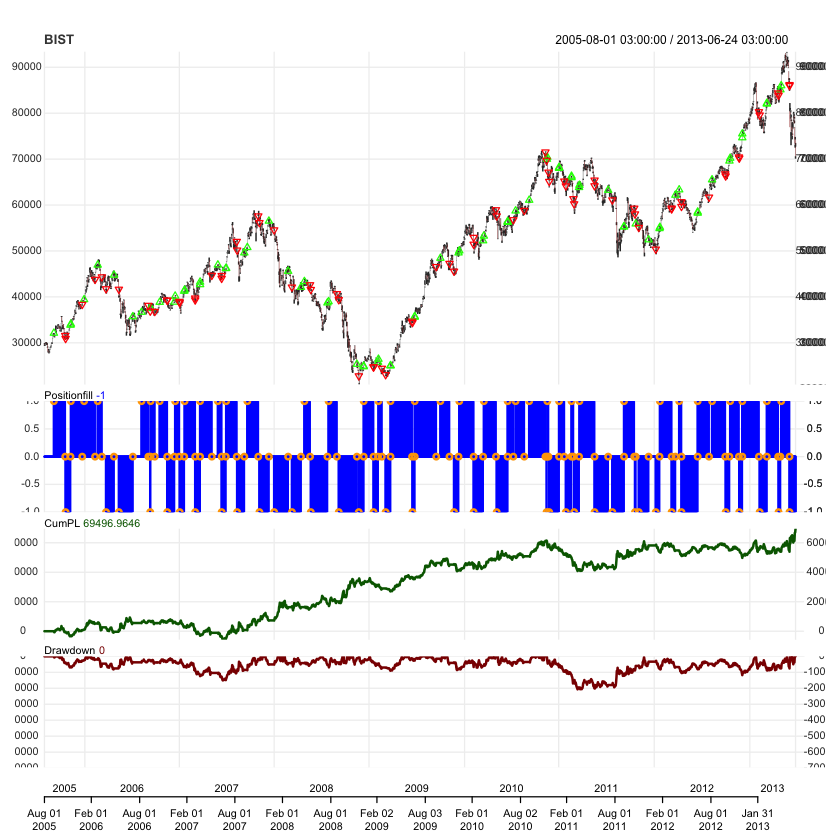

In [22]:
#Analyze performance
chart.Posn(portfolio.st, "BIST")

In [23]:
mktdata

                        Open     High      Low    Close Volume SMA.nFast
2005-08-01 03:00:00 29615.29 29935.55 29401.69 29776.69      0        NA
2005-08-02 03:00:00 29776.69 29881.48 29326.23 29543.48      0        NA
2005-08-03 03:00:00 29543.48 29996.22 29492.07 29727.05      0        NA
2005-08-04 03:00:00 29727.05 30163.10 29727.05 30123.59      0        NA
2005-08-05 03:00:00 30123.59 30123.59 29783.82 29945.44      0        NA
2005-08-08 03:00:00 29945.44 30125.81 29671.03 29924.83      0        NA
2005-08-09 03:00:00 29924.83 30013.71 29565.79 29701.00      0        NA
2005-08-10 03:00:00 29701.00 29954.26 29478.17 29683.21      0        NA
2005-08-11 03:00:00 29683.21 29683.21 28967.78 29111.84      0        NA
2005-08-12 03:00:00 29111.84 29182.23 28106.57 28175.93      0  29571.31
2005-08-15 03:00:00 28175.93 28237.86 27866.11 28074.94      0  29401.13
2005-08-16 03:00:00 28074.94 28665.82 28069.90 28257.65      0  29272.55
2005-08-17 03:00:00 28257.65 28257.65 27683.48 2790

In [24]:
OB<-getOrderBook(portfolio.st)[[portfolio.st]]$BIST

In [25]:
OB

                    Order.Qty Order.Price   Order.Type  Order.Side
2005-09-01 03:00:00 "1"       "32107.68975" "stoplimit" "long"    
2005-10-17 03:00:00 "all"     "31850.68"    "market"    "long"    
2005-10-17 03:00:00 "-1"      "30931.89335" "stoplimit" "short"   
2005-11-08 02:00:00 "all"     "33749.43"    "market"    "short"   
2005-11-08 02:00:00 "1"       "34087.19805" "stoplimit" "long"    
2005-12-21 02:00:00 "all"     "38210.24"    "market"    "long"    
2005-12-21 02:00:00 "-1"      "37456.02875" "stoplimit" "short"   
2005-12-28 02:00:00 "1"       "39416.27085" "stoplimit" "long"    
2006-02-14 02:00:00 "all"     "43507.51"    "market"    "long"    
2006-02-14 02:00:00 "-1"      "42730.10585" "stoplimit" "short"   
2006-02-22 02:00:00 "1"       "46948.04235" "stoplimit" "long"    
2006-03-10 02:00:00 "all"     "42521.94"    "market"    "long"    
2006-03-10 02:00:00 "-1"      "41750.4189"  "stoplimit" "short"   
2006-04-25 03:00:00 "all"     "45352.51"    "market"    "short

In [26]:
TrdStat<-t(tradeStats(portfolio.st, "BIST"))
TrdStat

,BIST
Portfolio,TrendFollowing
Symbol,BIST
Num.Txns,149
Num.Trades,74
Net.Trading.PL,69496.96
Avg.Trade.PL,728.597
Med.Trade.PL,7.3869
Largest.Winner,14029.23
Largest.Loser,-5319.35
Gross.Profits,135408.5


In [28]:
temp = get("GoldenCross", envir=.strategy)

In [31]:
mktdata

                        Open     High      Low    Close Volume SMA.nFast
2005-08-01 03:00:00 29615.29 29935.55 29401.69 29776.69      0        NA
2005-08-02 03:00:00 29776.69 29881.48 29326.23 29543.48      0        NA
2005-08-03 03:00:00 29543.48 29996.22 29492.07 29727.05      0        NA
2005-08-04 03:00:00 29727.05 30163.10 29727.05 30123.59      0        NA
2005-08-05 03:00:00 30123.59 30123.59 29783.82 29945.44      0        NA
2005-08-08 03:00:00 29945.44 30125.81 29671.03 29924.83      0        NA
2005-08-09 03:00:00 29924.83 30013.71 29565.79 29701.00      0        NA
2005-08-10 03:00:00 29701.00 29954.26 29478.17 29683.21      0        NA
2005-08-11 03:00:00 29683.21 29683.21 28967.78 29111.84      0        NA
2005-08-12 03:00:00 29111.84 29182.23 28106.57 28175.93      0  29571.31
2005-08-15 03:00:00 28175.93 28237.86 27866.11 28074.94      0  29401.13
2005-08-16 03:00:00 28074.94 28665.82 28069.90 28257.65      0  29272.55
2005-08-17 03:00:00 28257.65 28257.65 27683.48 2790